##### 

['symbol:^GDAXI,before_c:11125.500,after_c:11130.180,yesterday_c:11071.540,chgOnclose:0.000,chgToday:0.005', 'symbol:ADS.DE,before_c:201.900,after_c:202.300,yesterday_c:207.300,chgOnclose:0.002,chgToday:-0.024', 'symbol:ALV.DE,before_c:184.580,after_c:185.000,yesterday_c:183.280,chgOnclose:0.002,chgToday:0.009', 'symbol:BAS.DE,before_c:63.360,after_c:63.490,yesterday_c:63.160,chgOnclose:0.002,chgToday:0.005', 'symbol:BAYN.DE,before_c:66.000,after_c:66.020,yesterday_c:66.000,chgOnclose:0.000,chgToday:0.000', 'symbol:BEI.DE,before_c:85.660,after_c:85.520,yesterday_c:86.640,chgOnclose:-0.002,chgToday:-0.013', 'symbol:BMW.DE,before_c:72.960,after_c:73.120,yesterday_c:72.230,chgOnclose:0.002,chgToday:0.012', 'symbol:CBK.DE,before_c:6.829,after_c:6.849,yesterday_c:6.828,chgOnclose:0.003,chgToday:0.003', 'symbol:DAI.DE,before_c:51.000,after_c:51.090,yesterday_c:50.280,chgOnclose:0.002,chgToday:0.016', 'symbol:DB1.DE,before_c:114.500,after_c:114.600,yesterday_c:114.550,chgOnclose:0.001,chgToda

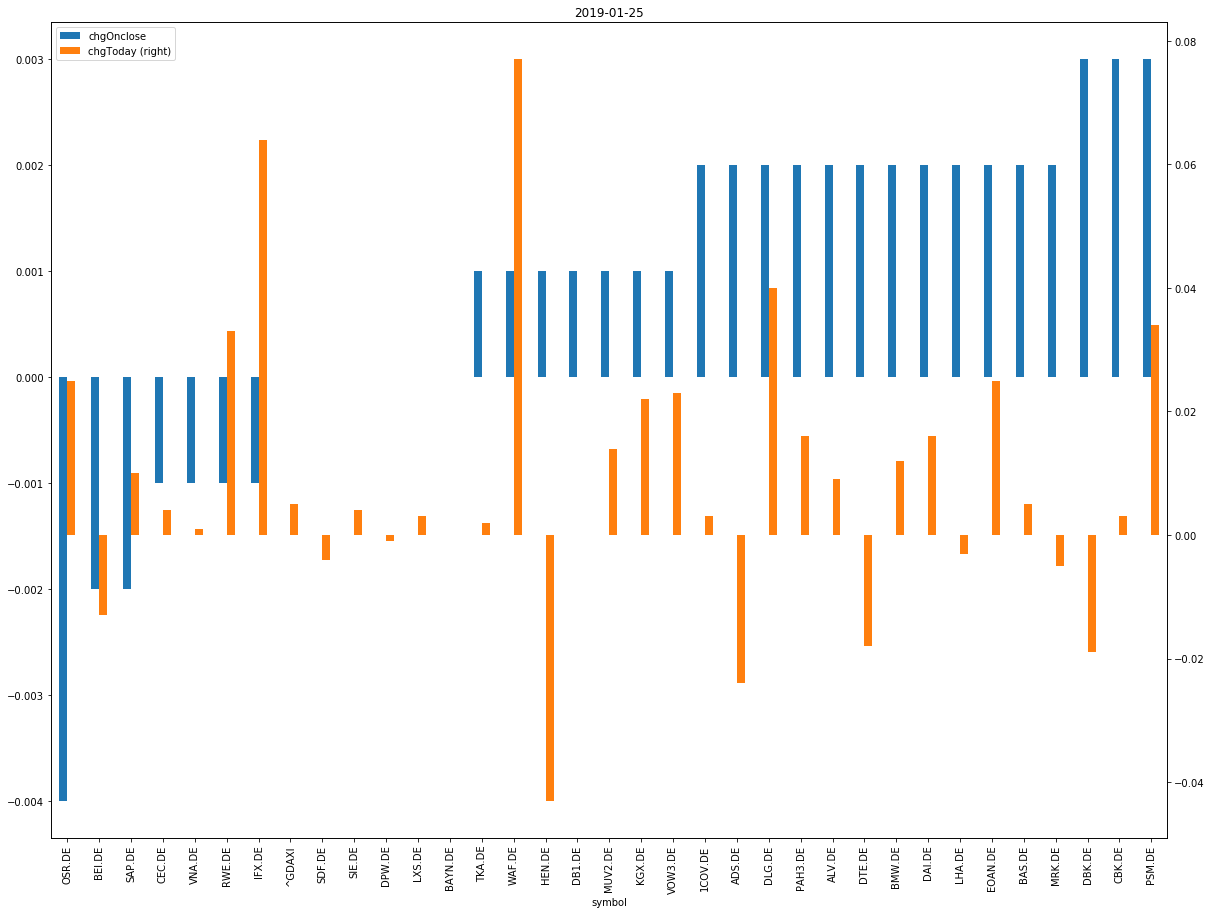

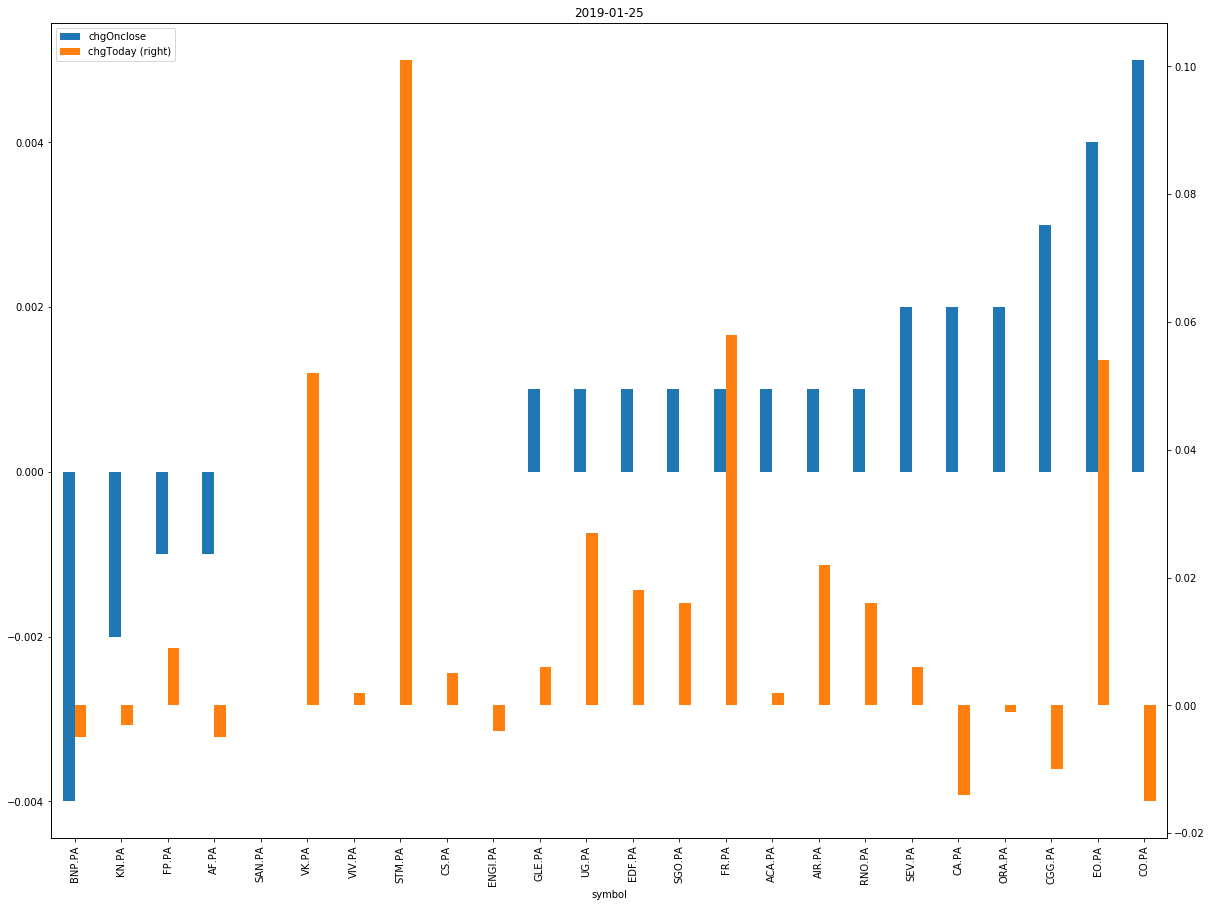

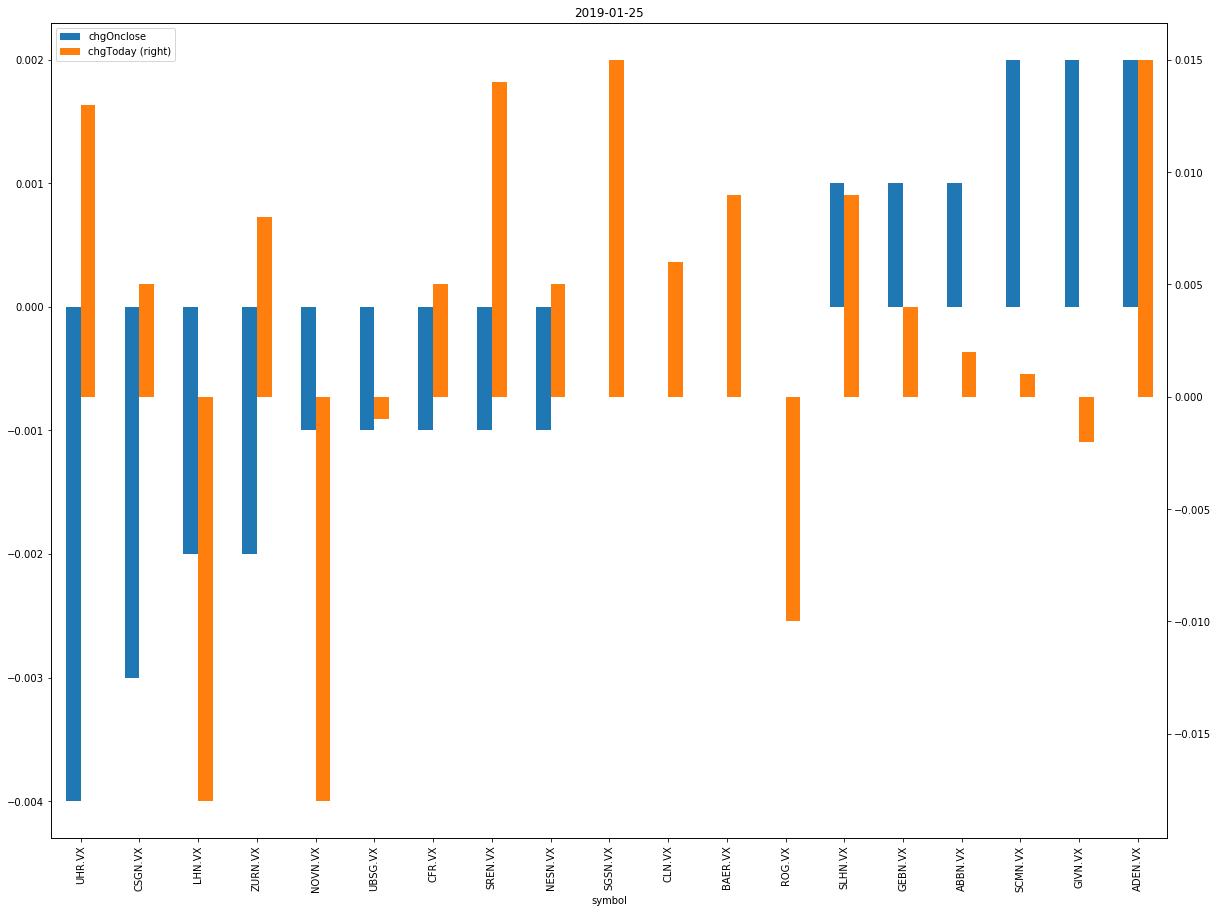

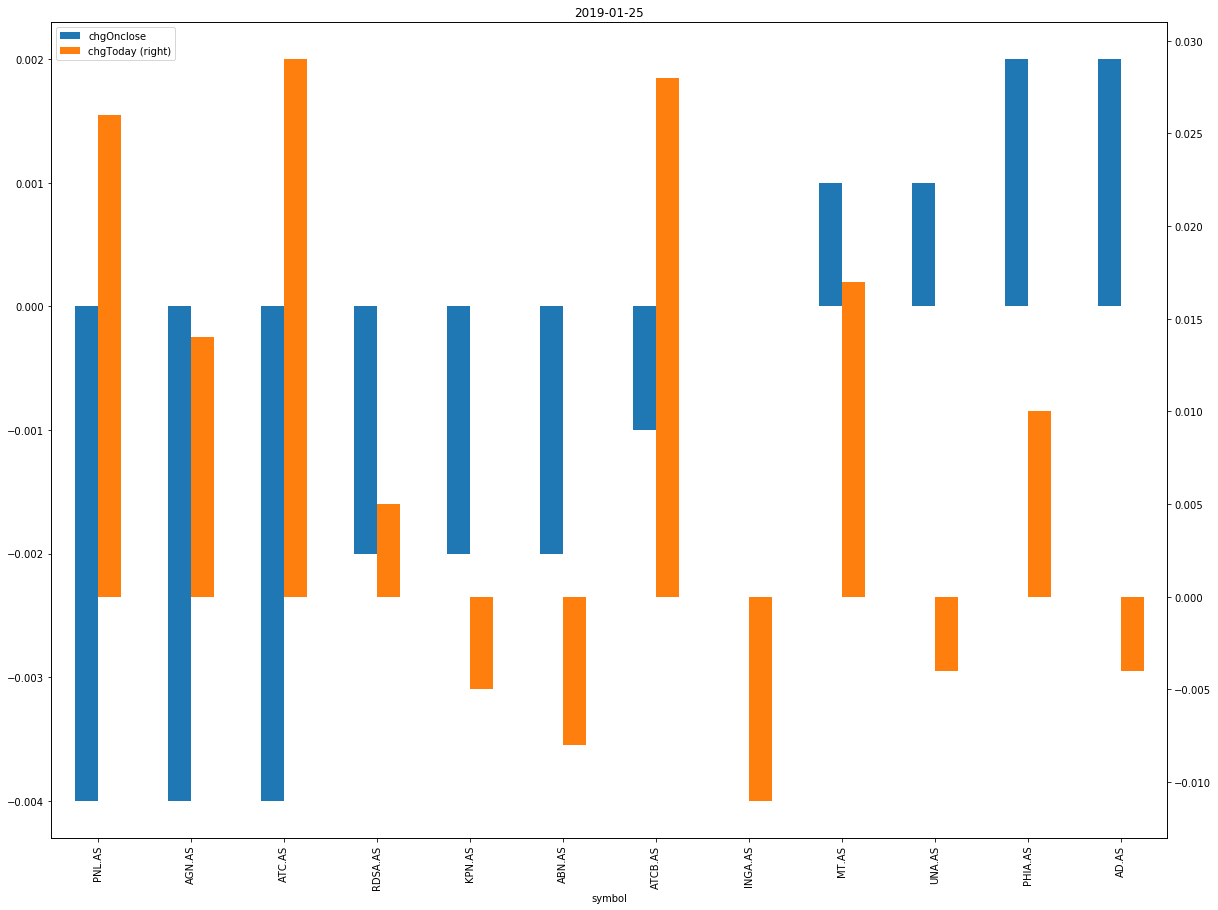

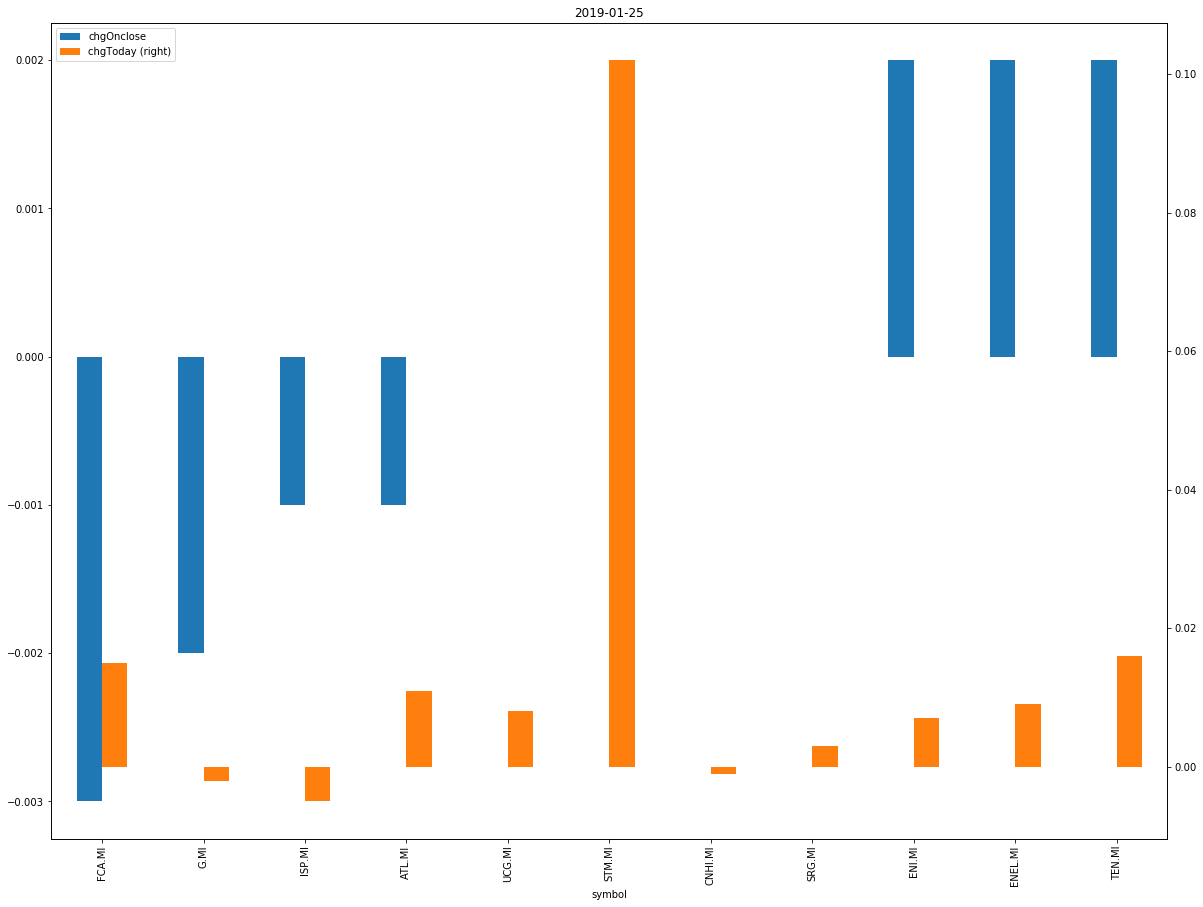

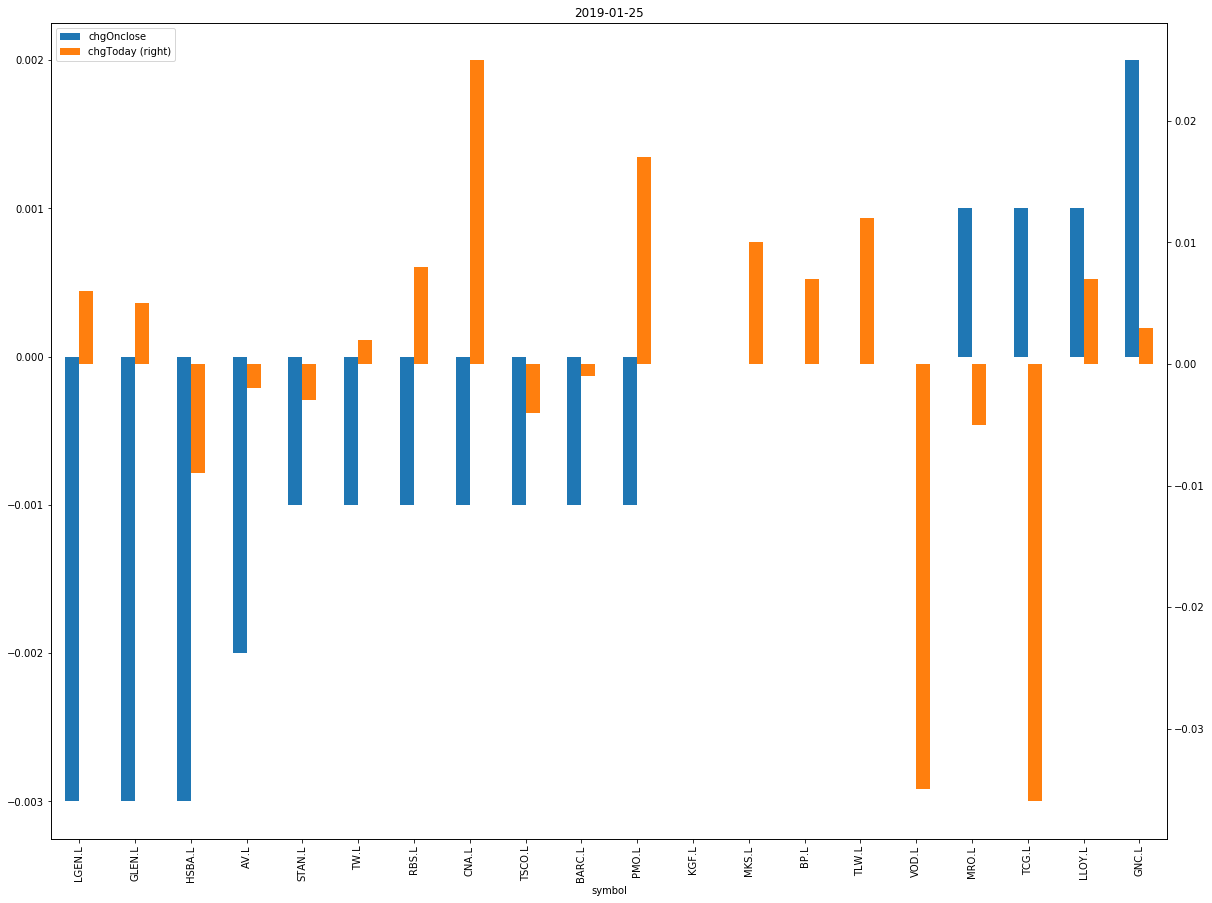

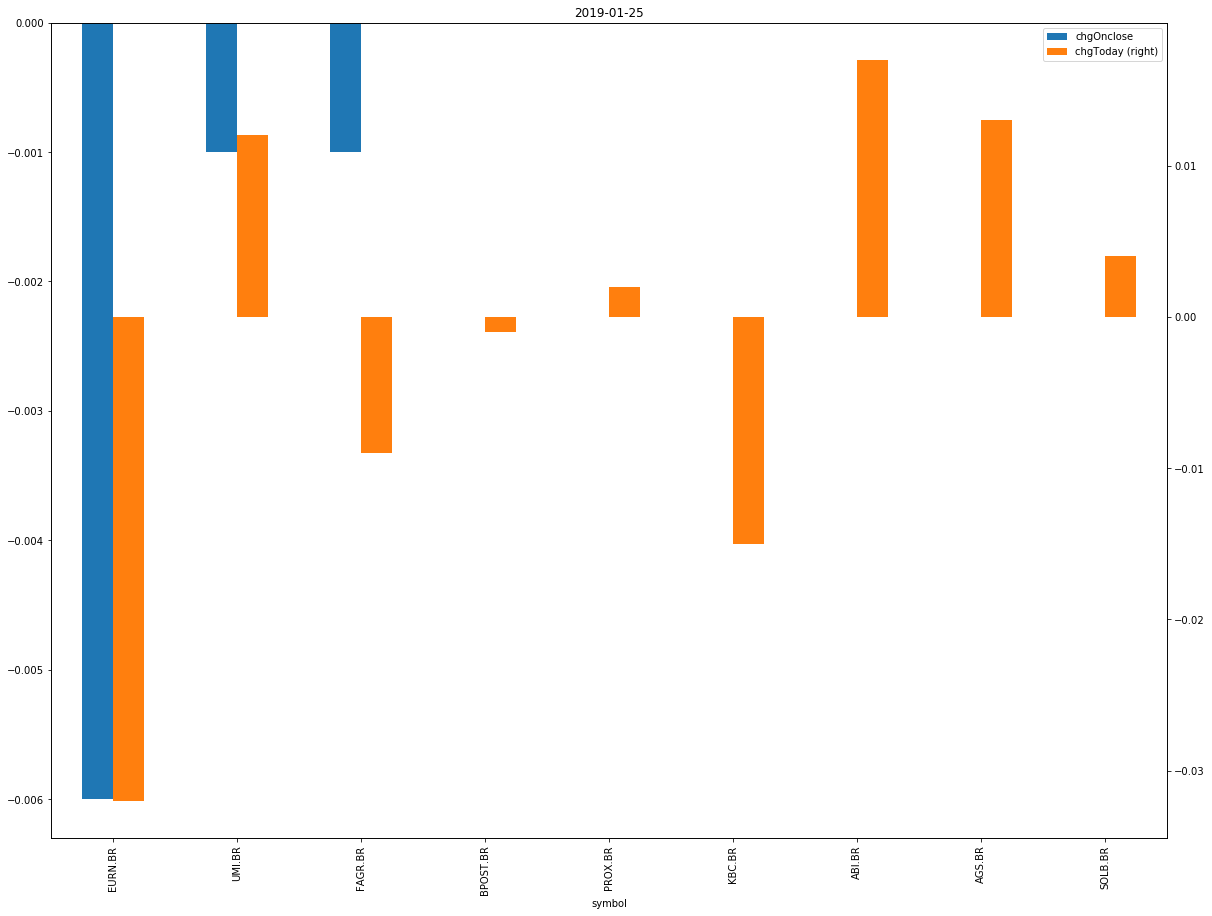

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 24 11:28:10 2018

@author: atq
"""
import os
#markets=['DE']
markets=['DE','PA','VX','AS','MI','.L','BR']
%matplotlib inline
import pandas as pd

for  market in markets:
    date1='2019-01-25'
    d='D:\\data\\onClose\\'+market+'\\'+date1+'\\'+date1+'.txt'
    l=[]
    try:
        
        f=open(d)
    except :
        print 'error'
        continue
        
    line = f.readline()  
    print line
    
    
    
    
    t=line[1:-2].split()
    for i in t:

        l.append(i.split(','))
    index=[]
    chgOclosel=[]
    chgTodayl=[]

    for i in l:
        symbol=i[0][8:]

        chgOclose=float(i[4][11:])
        chgToday=float(i[5][9:-1])
        index.append(symbol)
        chgOclosel.append(chgOclose)
        chgTodayl.append(chgToday)
    df=pd.DataFrame({'symbol':index,'chgOnclose':chgOclosel,'chgToday':chgTodayl})
    df= df.set_index('symbol')
    df=df.sort_values('chgOnclose')
    df1=df.sort_values('chgToday')
    df2=df.rank()
    df3=(df2['chgOnclose']-df2['chgToday'])/len(markets)
    #print df3.sort_values() 
    dr='D:\\data\\onClose\\0Rvalue\\'+market+'\\'+date1
    df3.sort_values().to_csv(dr)
    #df1=df.sort_values('chgToday')
    #df1.plot.bar()
    ax=df.plot(kind='bar',secondary_y='chgToday',figsize=(20,15) ,title=date1)
    os.chdir('d:\\data\\onClose')
    
    if not os.path.exists(date1):
        os.makedirs(date1)
    
    fig = ax.get_figure()
    fig.savefig('D:\\data\\onClose\\'+date1+'\\'+market+'.png')
